In [2]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



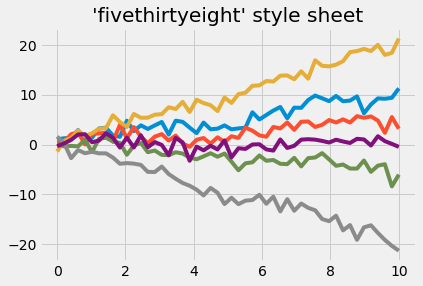

In [2]:
"""
===========================
FiveThirtyEight style sheet
===========================

This shows an example of the "fivethirtyeight" styling, which
tries to replicate the styles from FiveThirtyEight.com.
"""

from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

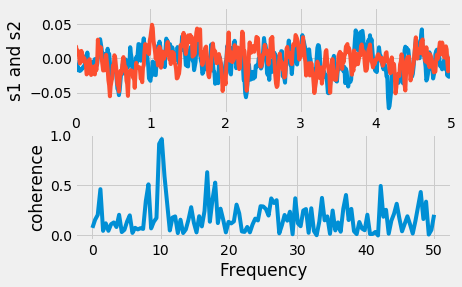

In [3]:
"""
Compute the coherence of two signals
"""
import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()

In [4]:
# sometimes it is nice to have ticklabels centered.  mpl currently
# associates a label with a tick, and the label can be aligned
# 'center', 'left', or 'right' using the horizontal alignment property:
#
#
#   for label in ax.xaxis.get_xticklabels():
#       label.set_horizontalalignment('right')
#
#
# but this doesn't help center the label between ticks.  One solution
# is to "face it".  Use the minor ticks to place a tick centered
# between the major ticks.  Here is an example that labels the months,
# centered between the ticks

import numpy as np
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# load some financial data; apple's stock price
fh = cbook.get_sample_data('aapl.npy.gz')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(fh, encoding='bytes')
except TypeError:
    r = np.load(fh)
fh.close()
r = r[-250:]  # get the last 250 days

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(r)//2
ax.set_xlabel(str(r.date[imid].year))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\aapl.npy.gz'

In [5]:
"""
Demonstrates using custom hillshading in a 3D surface plot.
"""
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\jacksboro_fault_dem.npz'

In [1]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [7]:
from iexfinance import Stock
tsla = Stock('TSLA')
tsla.get_open()
tsla.get_price()

ModuleNotFoundError: No module named 'iexfinance'

In [12]:
import tushare as ts
ts.get_k_data('600000')
ts.get_k_data('600000').tail()

,date,open,close,high,low,volume,code
636,2018-05-17,10.86,10.83,10.91,10.81,184746.0,600000
637,2018-05-18,10.85,10.90,10.90,10.81,217171.0,600000
638,2018-05-21,10.98,10.94,10.98,10.90,233937.0,600000
639,2018-05-22,10.94,10.88,10.95,10.85,160145.0,600000
640,2018-05-23,10.88,10.80,10.89,10.79,211944.0,600000


In [14]:
ts.get_hist_data('601688', start = '2015-01-01', end = '2018-05-23')


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-05-23,17.83,17.93,17.60,17.60,346488.50,-0.34,-1.90,18.012,18.338,18.468,376507.49,395598.92,463354.30,0.64
2018-05-22,18.26,18.30,17.94,17.78,525471.81,-0.38,-2.07,18.138,18.450,18.473,369172.51,397641.95,462250.20,0.97
2018-05-21,18.39,18.46,18.33,18.24,344517.78,0.07,0.38,18.224,18.557,18.441,386430.93,399361.89,453749.04,0.63
2018-05-18,17.95,18.28,18.27,17.94,328464.19,0.35,1.95,18.320,18.641,18.424,376709.09,420671.24,458374.20,0.60
2018-05-17,18.25,18.30,17.92,17.91,337595.16,-0.31,-1.70,18.416,18.708,18.403,378590.09,439950.59,468588.46,0.62
2018-05-16,18.28,18.47,18.23,18.19,309813.62,-0.14,-0.76,18.664,18.815,18.373,414690.35,498562.28,469351.23,0.57
2018-05-15,18.70,18.78,18.37,18.15,611763.88,-0.43,-2.29,18.762,18.822,18.323,426111.39,515921.56,470930.45,1.12
2018-05-14,18.72,18.98,18.81,18.72,295908.62,0.05,0.27,18.890,18.816,18.284,412292.85,507316.65,453859.02,0.54
2018-05-11,19.18,19.18,18.75,18.71,337869.16,-0.40,-2.09,18.962,18.713,18.232,464633.39,514102.13,455576.91,0.62


In [15]:
ts.get_today_all()

[Getting data:]############################################################

,code,name,changepercent,trade,open,high,low,settlement,volume,turnoverratio,amount,per,pb,mktcap,nmc
0,603999,读者传媒,-1.577,7.49,7.59,7.62,7.46,7.61,3280620.0,1.42388,2.473129e+07,57.176,2.546,4.314240e+05,1.725696e+05
1,603998,方盛制药,-4.403,9.77,10.22,10.23,9.72,10.22,3894000.0,0.91581,3.899539e+07,69.786,4.177,4.210249e+05,4.154172e+05
2,603997,继峰股份,1.637,11.80,11.70,11.96,11.64,11.61,3492169.0,0.55431,4.129088e+07,25.652,4.165,7.525087e+05,7.434000e+05
3,603996,中新科技,0.257,19.49,19.39,19.53,19.33,19.44,2528002.0,2.44784,4.909780e+07,39.776,3.875,5.849923e+05,2.012830e+05
4,603993,洛阳钼业,-3.822,7.80,7.99,8.06,7.79,8.11,127637969.0,0.98534,1.003838e+09,55.714,4.329,1.684741e+07,1.010391e+07
5,603991,至正股份,-2.382,27.46,28.13,28.28,27.31,28.13,664321.0,1.61718,1.855589e+07,50.852,4.373,2.046731e+05,1.128027e+05
6,603990,XD麦迪科,0.595,38.88,38.55,38.93,38.22,38.65,389603.0,0.64641,1.508228e+07,60.750,7.336,3.146271e+05,2.343375e+05
7,603989,艾华集团,-1.976,37.20,37.90,38.04,37.13,37.95,1086876.0,0.36229,4.079764e+07,38.351,5.439,1.116000e+06,1.116000e+06
8,603988,中电电机,-5.789,19.69,20.52,20.87,19.37,20.90,1942664.0,1.15635,3.870194e+07,70.321,3.507,3.307920e+05,3.307920e+05
9,603987,康德莱,-2.022,12.60,12.86,12.92,12.59,12.86,2845450.0,1.49704,3.634124e+07,33.158,3.167,3.974481e+05,2.394900e+05


In [17]:
ts.get_tick_data('601688', date = '2018-05-22')

,time,price,change,volume,amount,type
0,15:00:00,17.94,--,0,0,卖盘
1,15:00:00,17.94,--,0,0,卖盘
2,14:59:59,17.94,-0.01,34,60996,中性盘
3,14:59:56,17.95,0.01,48,86160,买盘
4,14:59:53,17.94,--,59,105846,买盘
5,14:59:49,17.94,--,210,376740,卖盘
6,14:59:46,17.94,-0.01,56,100464,卖盘
7,14:59:43,17.95,--,197,353615,买盘
8,14:59:40,17.95,--,54,96930,买盘
9,14:59:37,17.95,--,108,193860,买盘


In [18]:
ts.sh_margins(start = '2018-01-01', end = '2018-05-22')

[Getting data:]#

,opDate,rzye,rzmre,rqyl,rqylje,rqmcl,rzrqjyzl
0,2018-05-22,597985960989,20130655107,627590561,4738431993,66217588,602724392982
1,2018-05-21,595880340436,22954339139,639878127,4774908811,91042411,600655249247
2,2018-05-18,594145598040,17450293668,623244085,4611049856,90639341,598756647896
3,2018-05-17,595158136870,14970481628,609938641,4453809437,74778911,599611946307
4,2018-05-16,594416330170,18589326461,624035744,4596491045,82670037,599012821215
5,2018-05-15,593410196752,16843274130,615080747,4605082468,78345394,598015279220
6,2018-05-14,592905263679,17647263423,613708054,4573646168,86415258,597478909847
7,2018-05-11,592719427747,17227451352,603532099,4392449312,74526602,597111877059
8,2018-05-10,594735071550,18640720276,616132570,4548945214,85473140,599284016764
9,2018-05-09,593703956355,16553893663,606024654,4444716543,84683609,598148672898


In [20]:
ts.fund_holdings(2018, 1)

[Getting data:]###########################

,code,name,date,nums,nlast,count,clast,amount,ratio
0,603997,继峰股份,2018-03-31,2,-33,9.51,-510.09,120.68,0.02
1,603993,洛阳钼业,2018-03-31,56,-298,10713.56,-16073.65,85020.51,0.83
2,603989,艾华集团,2018-03-31,16,-74,402.76,-793.20,15848.49,1.34
3,603986,兆易创新,2018-03-31,127,-33,1473.39,-257.77,289962.40,7.14
4,603976,正川股份,2018-03-31,1,-34,0.10,-3.06,2.56,0.00
5,603960,克来机电,2018-03-31,4,-9,314.21,-21.21,10035.86,7.88
6,603959,百利科技,2018-03-31,5,-16,204.21,-367.96,7582.41,1.92
7,603939,益丰药房,2018-03-31,35,-48,2067.25,-1085.45,120892.51,5.70
8,603919,金徽酒,2018-03-31,2,-23,10.04,-684.19,162.45,0.09
9,603900,莱绅通灵,2018-03-31,22,-67,1182.21,-3029.29,31624.00,13.89


In [21]:
df = ts.realtime_boxoffice()
print(df)

   BoxOffice Irank    MovieName boxPer movieDay sumBoxOffice  \
0    1097.49     1        超时空同居  41.91        6     31818.94   
1     918.18     2  复仇者联盟3：无限战争  35.06       13    199043.69   
2     352.79     3         寂静之地  13.47        6     13932.54   
3      66.69     4        青年马克思   2.55       19      1133.85   
4      55.22     5        后来的我们   2.11       26    134871.42   
5      50.47     6           昼颜   1.93        6      1005.38   
6      15.88     7         狂暴巨兽   0.61       41     98537.83   
7      11.55     8         我是你妈   0.44       13      3577.67   
8       8.10     9    巴霍巴利王2：终结   0.31       20      7475.65   
9       7.81    10         幕后玩家   0.30       26     35675.35   
10     34.38    11           其它   1.00        0         0.00   

                   time  
0   2018-05-23 15:35:01  
1   2018-05-23 15:35:01  
2   2018-05-23 15:35:01  
3   2018-05-23 15:35:01  
4   2018-05-23 15:35:01  
5   2018-05-23 15:35:01  
6   2018-05-23 15:35:01  
7   2018-05-23 15:35:01

In [22]:
ts.get_hs300s()

,date,code,name,weight
0,2018-04-27,600000,浦发银行,1.25
1,2018-04-27,600008,首创股份,0.11
2,2018-04-27,600009,上海机场,0.44
3,2018-04-27,600010,包钢股份,0.26
4,2018-04-27,600011,华能国际,0.24
5,2018-04-27,600015,华夏银行,0.51
6,2018-04-27,600016,民生银行,1.67
7,2018-04-27,600018,上港集团,0.19
8,2018-04-27,600019,宝钢股份,0.75
9,2018-04-27,600021,上海电力,0.07


In [24]:
ts.forecast_data(2017, 4)

[Getting data:]#Error reading file 'http://vip.stock.finance.sina.com.cn/q/go.php/vFinanceAnalyze/kind/performance/index.phtml?s_i=&s_a=&s_c=&s_type=&reportdate=2017&quarter=4&p=1&num=60': failed to load external entity "http://vip.stock.finance.sina.com.cn/q/go.php/vFinanceAnalyze/kind/performance/index.phtml?s_i=&s_a=&s_c=&s_type=&reportdate=2017&quarter=4&p=1&num=60"


,code,name,type,report_date,pre_eps,range


In [25]:
ts.get_latest_news() #默认获取最近80条新闻数据，只提供新闻类型、链接和标题
ts.get_latest_news(top = 5, show_content = True)

Error reading file 'http://finance.sina.com.cn/stock/usstock/c/2018-05-23/doc-ihawmauc5702881.shtml': failed to load external entity "http://finance.sina.com.cn/stock/usstock/c/2018-05-23/doc-ihawmauc5702881.shtml"
Error reading file 'http://finance.sina.com.cn/stock/s/2018-05-23/doc-ihawmauc5648643.shtml': failed to load external entity "http://finance.sina.com.cn/stock/s/2018-05-23/doc-ihawmauc5648643.shtml"
Error reading file 'http://finance.sina.com.cn/stock/sdbk/2018-05-23/doc-ihawmauc5644469.shtml': failed to load external entity "http://finance.sina.com.cn/stock/sdbk/2018-05-23/doc-ihawmauc5644469.shtml"
Error reading file 'http://finance.sina.com.cn/stock/data/2018-05-23/doc-ihawmauc5623422.shtml': failed to load external entity "http://finance.sina.com.cn/stock/data/2018-05-23/doc-ihawmauc5623422.shtml"
Error reading file 'http://finance.sina.com.cn/stock/jsy/2018-05-23/doc-ihawmauc5603306.shtml': failed to load external entity "http://finance.sina.com.cn/stock/jsy/2018-05-23/

,classify,title,time,url,content
0,美股,路透：巴克莱目前没有与其它银行合并的计划,05-23 15:34,http://finance.sina.com.cn/stock/usstock/c/201...,None
1,证券,拟购无收入的负资产关联公司 东方银星遭交易所问询,05-23 15:27,http://finance.sina.com.cn/stock/s/2018-05-23/...,None
2,证券,十大博客看后市：下方空间不大机会仍存,05-23 15:27,http://finance.sina.com.cn/stock/sdbk/2018-05-...,None
3,证券,406亿资金争夺20股：主力资金重点出击2股(名单),05-23 15:24,http://finance.sina.com.cn/stock/data/2018-05-...,None
4,证券,收评：沪指跌逾1% 煤炭开采概念股表现乏力,05-23 15:22,http://finance.sina.com.cn/stock/jsy/2018-05-2...,None


In [26]:
ts.top_list('2018-05-22')

,code,name,pchange,amount,buy,sell,reason,bratio,sratio,date
0,000673,当代东方,-10.0098,42308.72,22688.73,19620.00,日跌幅偏离值达到7%的前五只证券,0.38,0.33,2018-05-22
1,000735,罗牛山,4.1903,40294.64,14507.84,25786.80,日换手率达到20%的前五只证券,0.04,0.08,2018-05-22
2,000760,斯太尔,10.0251,3803.96,2321.68,1482.28,日涨幅偏离值达到7%的前五只证券,0.27,0.17,2018-05-22
3,000890,法尔胜,-7.095,5115.72,1749.56,3366.16,日跌幅偏离值达到7%的前五只证券,0.13,0.26,2018-05-22
4,002072,凯瑞德,-9.9962,6078.64,1780.80,4297.84,日跌幅偏离值达到7%的前五只证券,0.41,0.99,2018-05-22
5,002072,凯瑞德,-9.9962,15400.19,5760.48,9639.71,连续三个交易日内，跌幅偏离值累计达到20%的证券,0.58,0.97,2018-05-22
6,002198,嘉应制药,-9.9808,830.22,161.05,669.17,日跌幅偏离值达到7%的前五只证券,0.24,1.00,2018-05-22
7,002212,南洋股份,10,21965.14,9365.29,12599.85,日涨幅偏离值达到7%的前五只证券,0.32,0.43,2018-05-22
8,002306,*ST云网,3.5714,4609.66,2715.29,1894.37,连续三个交易日内，涨幅偏离值累计达到12%的ST证券、*ST证券,0.24,0.17,2018-05-22
9,002427,*ST尤夫,4.9894,8107.64,4231.32,3876.32,连续三个交易日内，涨幅偏离值累计达到12%的ST证券、*ST证券,0.17,0.16,2018-05-22
